In [1]:
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
from statistics import stdev
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import itertools

In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Creating features from audio files

In [3]:
header = 'filename rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [4]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [5]:
Instruments = 'flu pia tru org gac voi cel cla gel sax vio'.split()

for i in Instruments:
    for filename in os.listdir(f'./../IRMAS/IRMAS-TrainingData/{i}'):
        songname = f'./../IRMAS/IRMAS-TrainingData/{i}/{filename}'
        y, sr = librosa.load(songname, sr =44100)
        
        # Normalize the audio signal
        if np.max(np.abs(y)) > 0:
            y = y / np.max(np.abs(y))
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, mfcc = 20)
        to_append = f'{filename} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {i}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [33]:
df = pd.read_csv('data.csv')
df.head()

,filename,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,[flu][cla]0441__1.wav,0.291247,2097.888106,2489.946563,3917.463313,0.044588,-117.974571,150.484253,-45.797680,31.572208,...,12.865310,5.979919,-0.760617,-2.864177,-10.078252,-9.153671,-5.919430,1.270640,-5.099973,flu
1,[flu][pop_roc]0372__1.wav,0.181578,1788.342988,3053.350600,3598.705395,0.024457,-172.576675,168.074860,8.713345,38.584534,...,0.733319,-3.077334,-3.865695,-7.703885,-7.980325,-0.265409,-0.590245,2.773574,-1.158271,flu
2,[flu][pop_roc]0489__3.wav,0.220867,1415.090135,1338.522930,2574.007601,0.044043,-155.153275,235.551620,-72.608337,1.650665,...,-4.480639,-4.898223,1.072633,8.016641,8.928833,3.030756,-6.311553,-13.654664,-10.805024,flu
3,061__[flu][dru][pop_roc]0419__2.wav,0.227103,1457.059723,2070.808305,2434.665329,0.035720,-187.106369,188.077667,-17.081150,22.657726,...,11.541116,8.014238,-9.074387,-9.779532,-8.943732,-7.005507,-2.292251,-2.062893,1.445740,flu
4,[flu][cla]0373__1.wav,0.419677,1903.336678,2381.898282,2342.879012,0.047959,-258.463898,92.393463,-23.503511,-9.021843,...,-23.929064,-29.581631,-23.973606,11.314721,24.038221,16.351347,-0.176796,-3.863950,-2.982665,flu


In [34]:
features = df[df.columns[2:26]]

# PCA Analysis

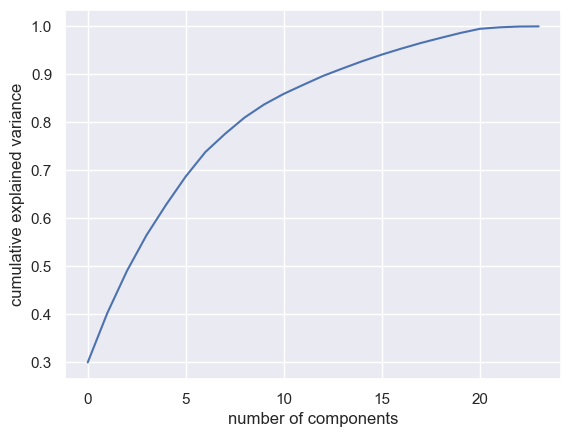

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
X = scale(features)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [36]:
# Dropping unnecessary columns
df = df.drop(['filename'],axis=1)
df1 = shuffle(df)
df1

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
24,0.215906,919.128345,1528.302211,1452.867663,0.023852,-262.158234,198.108383,2.980271,1.666901,18.679062,...,4.714263,3.922375,-0.435165,-3.351104,-1.631571,3.989588,6.648165,2.894482,-5.771908,flu
5482,0.179410,2230.513215,2799.198935,4849.543391,0.044699,-107.693199,173.785767,-44.479649,53.355801,-20.966412,...,0.645369,-4.738396,-10.403969,0.316708,-4.839176,-1.860159,-7.258254,-0.216568,-4.745253,gel
3269,0.154211,1312.841515,2281.141761,2657.479941,0.018917,-234.820587,175.633301,-2.247405,33.726585,17.574280,...,-4.448046,0.769784,-7.569833,-5.101198,-0.419933,-6.996013,-6.557193,0.202570,-2.816923,voi
2775,0.207972,1390.828584,2559.310946,2929.347023,0.015148,-216.892731,171.342133,16.827797,44.083958,15.562710,...,4.954430,3.862687,4.853490,4.166305,0.099866,1.146026,0.769504,0.882773,-2.670108,gac
5213,0.203703,1798.434797,1734.050867,3409.728674,0.044703,-155.022369,202.856628,-85.610558,15.963861,29.378950,...,-17.233568,-6.012464,-10.215275,-16.507669,-8.719670,-8.307410,-6.190088,-2.190563,-6.409363,gel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.117816,1532.100520,2591.309338,2847.537479,0.022896,-237.302094,171.119537,20.758268,27.892841,5.046553,...,-0.435488,-2.636835,-0.391241,-0.916768,0.870275,-3.512754,-7.465983,-3.893401,-4.419255,org
4273,0.203902,1922.743608,2281.975271,4134.873839,0.049079,-149.228699,171.020004,-42.575809,51.630795,6.293901,...,14.367578,14.907774,5.528225,4.493822,7.727618,-3.179411,-4.980753,-7.762661,-2.415029,cla
5176,0.221554,2456.117589,2687.472443,4878.226615,0.063073,-97.314507,170.976990,-59.470825,45.705345,-19.921324,...,-7.792618,-1.582267,-3.847075,-2.110422,-7.603212,0.535093,0.994422,5.970380,-1.026071,gel
3862,0.220582,1036.282612,1679.822542,1905.646907,0.023191,-203.007385,197.585724,-9.936279,12.062400,29.213160,...,1.756768,-1.704800,-7.904314,-4.973323,1.110100,1.821130,-0.872884,-5.005117,-6.192472,cel


In [37]:
instru_list = df1.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [38]:
y

array([ 2,  4, 10, ...,  4,  0,  8])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM

In [40]:
svclassifier = SVC(probability=True, kernel='rbf', C = 10.0, gamma=0.1)
svclassifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1, probability=True)

## Save the Model


In [43]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svclassifier, file)
    
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
    
# Save the mapping (label encoder) for use in the software
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_train, y_train)
print("Validation score: {0:.2f} %".format(100 * score))


Validation score: 99.78 %


## Analyze model performance

In [44]:
# predicted_labels = svclassifier.predict(X_test)
Ypredict = pickle_model.predict(X_test)

In [45]:
print("Recall: ", recall_score(y_test, Ypredict,average=None))
print("Precision: ", precision_score(y_test, Ypredict,average=None))
print("F1-Score: ", f1_score(y_test, Ypredict, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, Ypredict,normalize=True), accuracy_score(y_test, Ypredict,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, Ypredict))

Recall:  [0.66666667 0.65686275 0.62637363 0.76335878 0.6969697  0.73880597
 0.66906475 0.53982301 0.64516129 0.6        0.69230769]
Precision:  [0.62857143 0.67       0.50442478 0.66225166 0.71875    0.7173913
 0.69924812 0.62886598 0.68376068 0.61538462 0.74482759]
F1-Score:  [0.64705882 0.66336634 0.55882353 0.70921986 0.70769231 0.72794118
 0.68382353 0.58095238 0.66390041 0.60759494 0.71760797]
Accuracy: 0.67  , 896.0
Number of samples: 1341
[[ 44   2   3   2   3   0   2   1   2   6   1]
 [  2  67   6   7   3   3   1   2   5   6   0]
 [  5   5  57   6   2   4   4   2   2   0   4]
 [  3   2   4 100   2   2   5   4   1   4   4]
 [  0   1   7   9 115   6   5   5   3   6   8]
 [  0   1   7   3   9  99   2   0   3   1   9]
 [  2   4   6   6   3   9  93   8   4   3   1]
 [  4   5   7   4   6   2   7  61   7   8   2]
 [  1   6   6   5   1   3   5   5  80   7   5]
 [  6   5   8   5   7   4   6   1   3  72   3]
 [  3   2   2   4   9   6   3   8   7   4 108]]


## Confusion Matrix Visualization

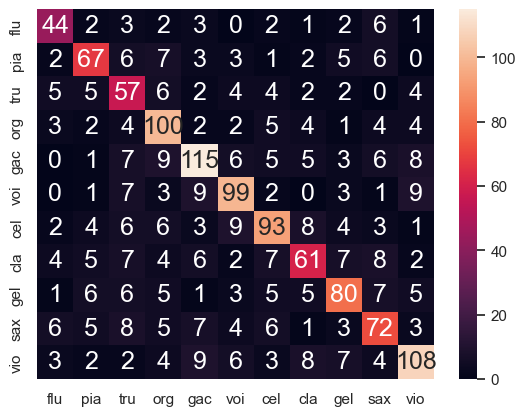

In [46]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, Ypredict),index=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"], columns=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()